torch.Size([12, 1024, 2])
(12, 1024, 4)
torch.Size([12, 1024, 5])


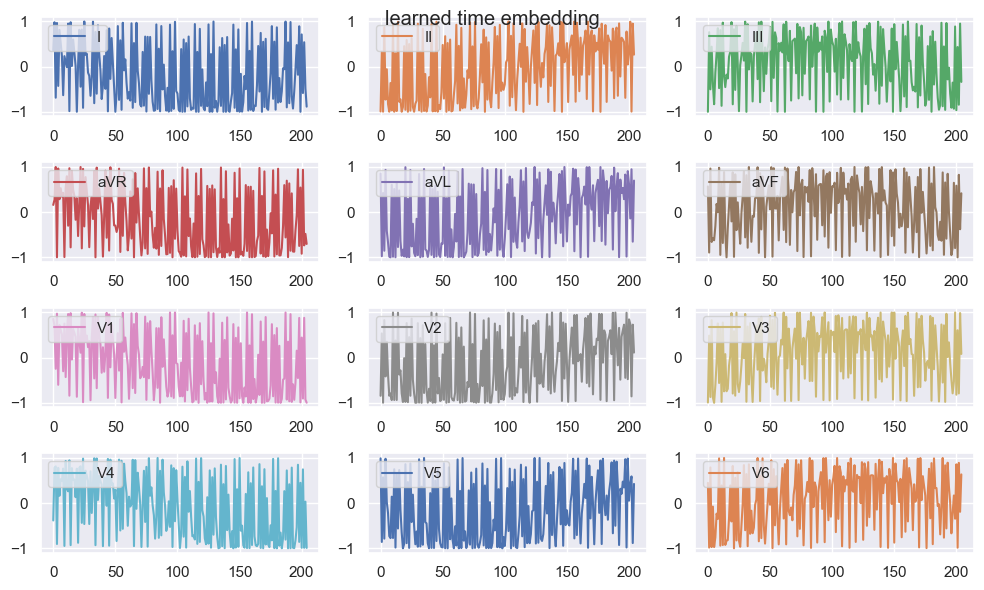

(<module 'matplotlib.pyplot' from '/home/engs2522/local/conda/envs/pytorch3d/lib/python3.9/site-packages/matplotlib/pyplot.py'>,
 array([[<Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >]], dtype=object))

In [14]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../..')))
from multi_modal_heart.ECG.ecg_utils import arraytodataframe, plot_ecg_frame
from multi_modal_heart.model.custom_layers.pos_embed import SineActivation,get_1d_sincos_pos_embed_from_grid
import torch
# 1024 * 2 
ECG_length=1024
time_position = torch.arange(0, ECG_length).unsqueeze(0)
lead_position = torch.arange(0, 12).unsqueeze(1)

ecg_position = torch.cat([lead_position.repeat(1,ECG_length).unsqueeze(2),time_position.repeat(12,1).unsqueeze(2)],dim=2)
ecg_position = ecg_position.float()
print(ecg_position.shape)

##
print(time_pos.shape)
time_pos_vec = torch.from_numpy(time_pos).float()
## init positional embedding
time_encoder= SineActivation(4,5)
time_embedding = time_encoder(time_pos_vec)
print(time_embedding.shape)

plot_ecg_frame(arraytodataframe(time_embedding[:,::5,0].data.numpy()), title="learned time embedding",figsize=(10,6),figure_arrangement=(4,3))

/home/engs2522/project/multi-modal-heart/multi_modal_heart/model/custom_layers/pos_embed.py:69: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  omega = np.arange(embed_dim // 2, dtype=np.float)


(12288, 4)
(12, 1024, 4)


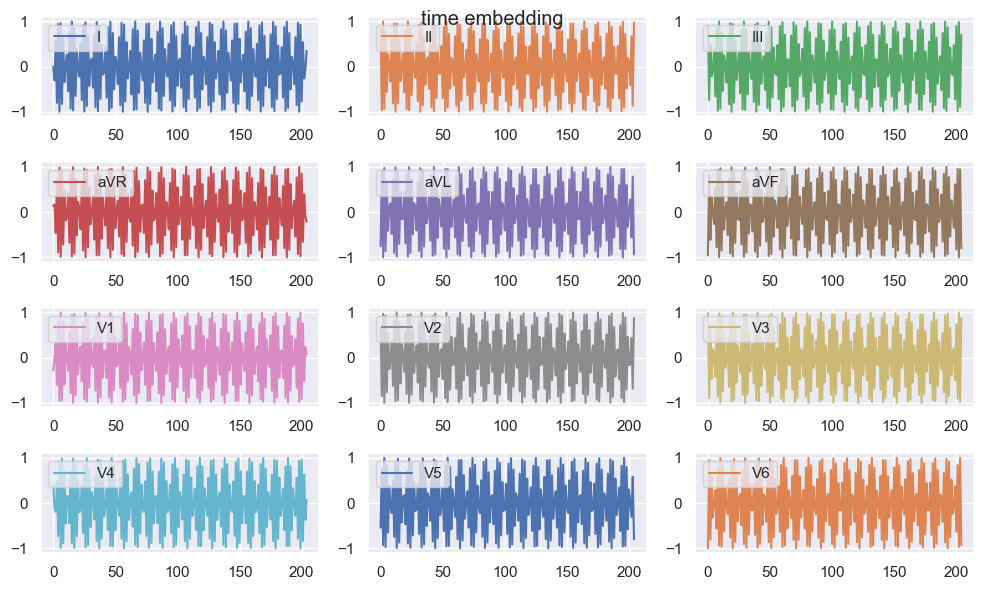

(<module 'matplotlib.pyplot' from '/home/engs2522/local/conda/envs/pytorch3d/lib/python3.9/site-packages/matplotlib/pyplot.py'>,
 array([[<Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >]], dtype=object))

In [8]:
## fixed time encoding
import numpy as np
time_dim = 4
lead_channels = 12
ECG_length =1024
time_pos = get_1d_sincos_pos_embed_from_grid(time_dim,np.arange(0,ECG_length*lead_channels)) ##ECG_length*time_dim
print (time_pos.shape)
time_pos = np.reshape(time_pos, (ECG_length,lead_channels,time_dim))
time_pos = np.transpose(time_pos, (1,0,2))
print (time_pos.shape)
plot_ecg_frame(arraytodataframe(time_pos[:,::5,0]), title="time embedding",figsize=(10,6),figure_arrangement=(4,3))

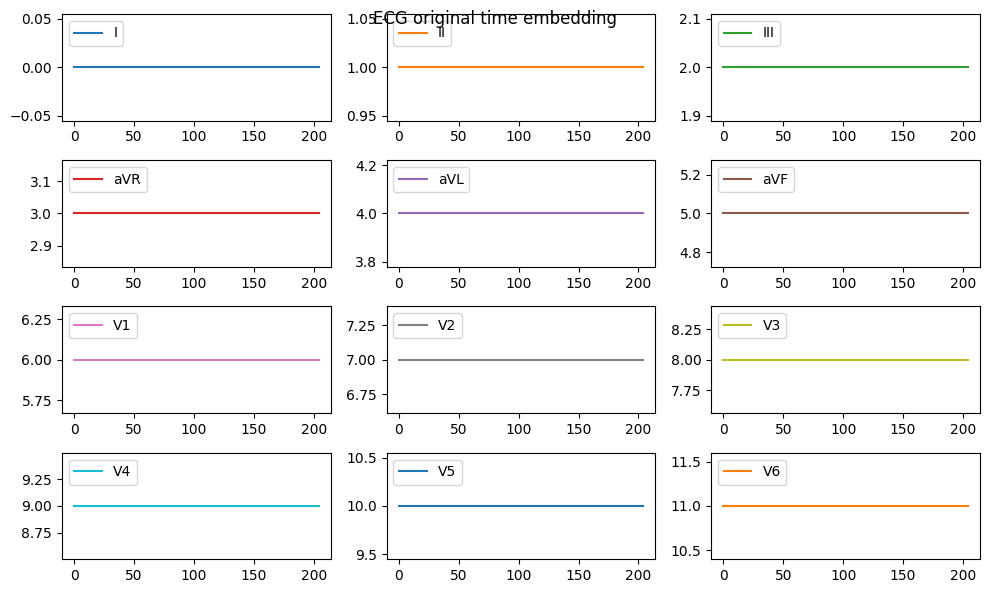

In [17]:
## original time encoding
time_position = torch.arange(0, ECG_length).unsqueeze(0)
lead_position = torch.arange(0, lead_channels).unsqueeze(1)
ecg_position = torch.cat([lead_position.repeat(1,ECG_length).unsqueeze(2),time_position.repeat(lead_channels,1).unsqueeze(2)],dim=2)
plot_ecg_frame(arraytodataframe(ecg_position[:,::5,0].data.numpy()), title="ECG original time embedding",figsize=(10,6),figure_arrangement=(4,3))